In [1]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob
import textstat

In [2]:
#Reading in twitter dataset
text_df = pd.read_csv('../data/twcs/twcs.csv')

In [9]:
text_df.head(200)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [164]:
text_df.shape

(2811774, 7)

In [145]:
text_df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

In [20]:
unique_authors = []

for a in text_df['author_id']:
    if (a.isalpha()) == True:
        if a not in unique_authors:
            unique_authors.append(a)

In [21]:
unique_authors

['sprintcare',
 'VerizonSupport',
 'ChipotleTweets',
 'AskPlayStation',
 'marksandspencer',
 'MicrosoftHelps',
 'ATVIAssist',
 'AdobeCare',
 'AmazonHelp',
 'XboxSupport',
 'AirbnbHelp',
 'nationalrailenq',
 'AirAsiaSupport',
 'Morrisons',
 'NikeSupport',
 'AskAmex',
 'McDonalds',
 'YahooCare',
 'AskLyft',
 'UPSHelp',
 'Delta',
 'AppleSupport',
 'Tesco',
 'SpotifyCares',
 'comcastcares',
 'AmericanAir',
 'TMobileHelp',
 'VirginTrains',
 'SouthwestAir',
 'AskeBay',
 'GWRHelp',
 'sainsburys',
 'AskPayPal',
 'HPSupport',
 'ChaseSupport',
 'CoxHelp',
 'DropboxSupport',
 'VirginAtlantic',
 'AzureSupport',
 'AlaskaAir',
 'ArgosHelpers',
 'AskTarget',
 'GoDaddyHelp',
 'CenturyLinkHelp',
 'AskPapaJohns',
 'askpanera',
 'Walmart',
 'USCellularCares',
 'AsurionCares',
 'GloCare',
 'NeweggService',
 'VirginAmerica',
 'DunkinDonuts',
 'TfL',
 'asksalesforce',
 'Kimpton',
 'AskCiti',
 'IHGService',
 'LondonMidland',
 'JetBlue',
 'BoostCare',
 'JackBox',
 'AldiUK',
 'HiltonHelp',
 'GooglePlayMusic',


In [148]:
sprintcare_responses = pd.DataFrame(text_df[((text_df['author_id'] == 'AskPayPal') & (text_df['inbound'] == False))]['text'])
sprintcare_responses.reset_index(drop = True, inplace = True)

In [149]:
sprintcare_responses.head()

,text
0,@115992 Hello! Thank you for reaching out to u...
1,@115994 Glad we could help you out! :D ^DP
2,@115995 Hi there! Please send me a DM! ^RA
3,"@115997 I've just responded to your DM, please..."
4,"@115998 Hi there, we've replied to your DM! ^RA"


In [150]:
sprintcare_responses['text']=sprintcare_responses['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

sprintcare_responses['text']=sprintcare_responses['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

sprintcare_responses['text']=sprintcare_responses['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# stopwords removal and lemmatization
sprintcare_responses['text']=sprintcare_responses['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

sprintcare_responses.head()

,text
0,hello thank reach send dm assistance ml
1,glad help d dp
2,hi send dm ra
3,ve respond dm check inbox early convenience ...
4,hi ve reply dm ra


In [151]:
sprintcare_responses.shape

(11298, 1)

In [152]:
text_combined = ' '.join(sprintcare_responses.text)

In [153]:
text_combined

'  hello thank reach send dm assistance ml   glad help d dp   hi send dm ra   ve respond dm check inbox early convenience thank patience kt   hi ve reply dm ra   sorry hear trouble run send dm help ga   sadly close account   close account   op httpstco   sorry confusion dm help ga   sorry hear trouble access account send dm help ga   hi ve reply dm   jmr   hi m sorry hear send dm need assistance m happy help jmr   hey ve respond dm message chance el   hello thank reach send dm information assist jdg   sorry trouble email dm happy help ga   m sorry hear frustration answer dm check message   dès la création dun compte paypal vous pouvez enregistrer votre compte bancaire ajouter de largent sur votre solde paypal et faire vos paiement en toute sécurité voici un lien utile   httpstco em   hey thank reach time provide support   chinese english french german j httpstco   m sorry hear frustration send dm paypal email address screenshot charge   hi ve send reply message   jmr   m sorry hear fru

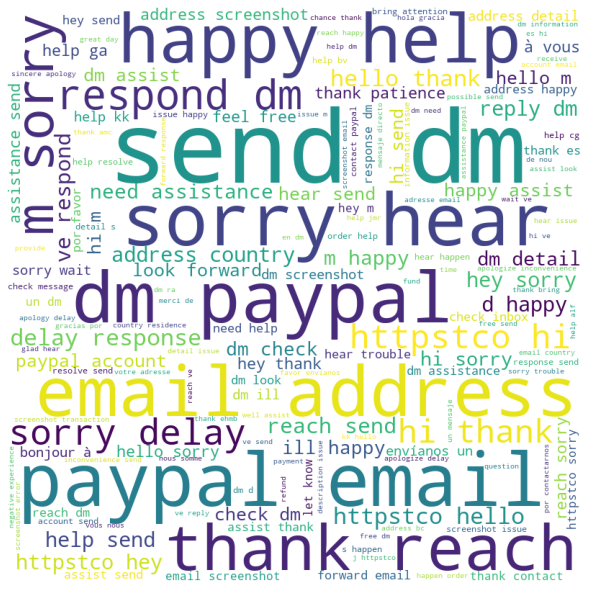

In [154]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [155]:
list_responses_by_sprintcare = []
for i in text_df['text']:
    if '@AskPayPal' in i:
        list_responses_by_sprintcare.append(i)
    
list_responses_by_sprintcare

['@115993 @AskPayPal “If I don’t provide the required information by 15 Feb 1970” https://t.co/zTVGb15FH6',
 '@AskPayPal Hello, I\'d like to add tracking info to my invoice but the "Add tracking info" link always lead to blank page. Please help.',
 '@AskPayPal I set up a paypal account before i was 18. Fair play, my bad. Was wondering if i could shut down the account so i can restart it now im 18?',
 '@AskPayPal I am 18',
 '@AskPayPal i have a serious problem i need help with.',
 '@AskPayPal Been locked out of my account for 2 hrs. 2 different agents have “reset my account for me” &amp; still no dice as soon as they get off phone',
 'Good morning, a @AskPayPal customer service rep just made me cry.',
 '@AskPayPal I’ve sent a dm to ask regarding a charge in my bank acc, could you pls get back to me to advice?',
 "@AskPayPal hello. why you don't process my request to change my name? I sent copy of passport about a week ago, but you still remain silent.",
 '@AskPayPal hello bought airtime

In [156]:
##Finding what the user is most concerned with
responses_by_sprintcare = pd.DataFrame(list_responses_by_sprintcare,columns = ['text'])


responses_by_sprintcare.head()

,text
0,@115993 @AskPayPal “If I don’t provide the req...
1,"@AskPayPal Hello, I'd like to add tracking inf..."
2,@AskPayPal I set up a paypal account before i ...
3,@AskPayPal I am 18
4,@AskPayPal i have a serious problem i need hel...


In [157]:
responses_by_sprintcare.shape

(10164, 1)

In [158]:
responses_by_sprintcare['text']=responses_by_sprintcare['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

responses_by_sprintcare['text']=responses_by_sprintcare['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

responses_by_sprintcare['text']=responses_by_sprintcare['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# stopwords removal and lemmatization
responses_by_sprintcare['text']=responses_by_sprintcare['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

responses_by_sprintcare.head()

,text
0,"askpaypal "" provide require information fe..."
1,askpaypal hello d like add track info invoice ...
2,askpaypal set paypal account fair play bad w...
3,askpaypal
4,askpaypal problem need help


In [159]:
text_combined = ' '.join(responses_by_sprintcare.text)

In [160]:
text_combined=text_combined.replace('askpaypal', "").replace('httpstco',"")#.replace("game","").replace("xbox","")

In [161]:
text_combined

'   " provide require information   feb "   hello d like add track info invoice add track info link lead blank page help  set paypal account   fair play bad wonder shut account restart m   problem need help  lock account   hrs   different agent " reset account " amp dice soon phone good morning  customer service rep cry  send dm ask charge bank acc pls advice  hello nt process request change send copy passport week ago remain silent  hello buy airtime   confirm    instead   kindly help reverse  \r\r love start email 😁   reply like way  work keep money pende annoy annoyed 😡 😥  help  \n have issue couple hour try signup access new account help   customer service horrible ve experience jeez  reply  hi paypal today take owe bank paypal balance charge twice  hi talk private massege    refund request active week money card  email      hack account take money   week later countless email hour hold happen  receive payment confirmation mum account email address massive breach datum protection  

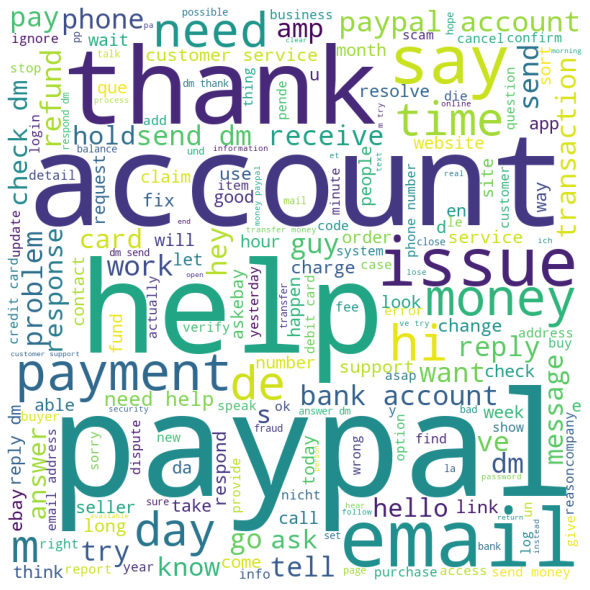

In [162]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [163]:
words = text_combined.split(" ")
# Get the set of unique words.
uniques = []
for word in words:
  if word not in uniques:
    uniques.append(word)

# Make a list of (count, unique) tuples.
counts = []
for unique in uniques:
  count = 0              # Initialize the count to zero.
  for word in words:     # Iterate over the words.
    if word == unique:   # Is this word equal to the current unique?
      count += 1         # If so, increment the count
  counts.append((count, unique))

counts.sort()            # Sorting the list puts the lowest counts first.
counts.reverse()         # Reverse it, putting the highest counts first.
# Print the ten words with the highest counts.
for i in range(min(50, len(counts))):
  count, word = counts[i]
  print('%s %d' % (word, count))

 24856
account 1862
paypal 1824
not 1399
help 1241
dm 1180
send 1031
thank 977
email 971
money 970
try 751
get 649
hi 648
payment 621
need 572
reply 558
say 517
bank 501
day 486
issue 472
ve 467
m 450
time 444
de 439
card 428
receive 421
phone 399
pay 399
customer 399
service 392
check 389

 377
message 363
guy 343
hold 342
refund 336
wait 331
hey 313
problem 310
hour 307
number 296
go 295
transaction 294
work 292
support 281
answer 278
want 267
long 262
response 254
know 253
